In [39]:
# Fourier optics with numpy

In [40]:
import cv2 #Using it only to read the image
import numpy as np
from matplotlib import pyplot as plt

In [41]:
img = cv2.imread('iith.png',0)

In [42]:
# Fourier Transform
f = np.fft.fft2(img) 

fftshift(f) rotates the FFT results so that the DC bin is in the center of the result, halfway between -Fs/2 and Fs/2, which is a common spectrum display format.

In [43]:
fshift = np.fft.fftshift(f)

Text(0.5, 1.0, 'Input Image')

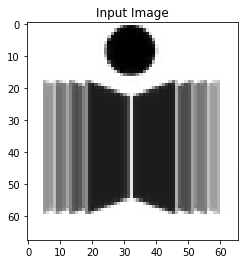

In [44]:
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')

Text(0.5, 1.0, 'Freq.Domain Fourier Transform')

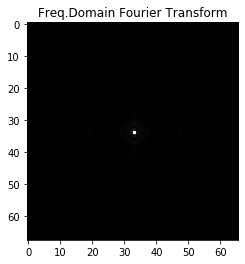

In [45]:
#Since fshift array has complex values, use np.abs()
plt.imshow(np.abs(fshift), cmap = 'gray') 
plt.title('Freq.Domain Fourier Transform')

Text(0.5, 1.0, 'Magnitude Spectrum')

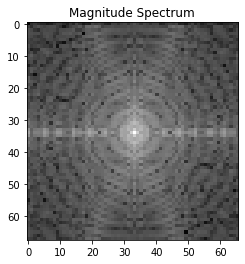

In [46]:
# To make it more clear apply a log to it, almost like inverting the image
magnitude_spectrum = np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')

In [60]:
# High Pass Filter
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
fshift[crow-30:crow+30][ccol-30:ccol+30] = 0 # We just choose all lower frequencies from the fshift image above to be zero
f_ishift = np.fft.ifftshift(fshift) # Inverse for the shift as well
filtered_img = np.fft.ifft2(f_ishift) # Inverse fourier transform
filtered_img = np.abs(filtered_img) # To make the array real

Text(0.5, 1.0, 'High Pass Filter')

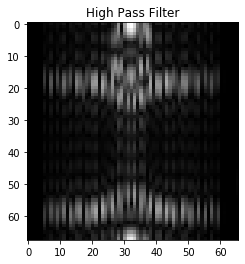

In [61]:
plt.imshow(filtered_img, cmap = 'gray')
plt.title('High Pass Filter')

In [62]:
#  Similarly can be tried for Low pass filter as well